**This notebook is an exercise in the [Advanced SQL](https://www.kaggle.com/learn/advanced-sql) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/nested-and-repeated-data).**

---


# Introduction

Now that you know how to query nested and repeated data, you're ready to draw interesting insights from the [GitHub Repos](https://www.kaggle.com/github/github-repos) dataset.  

Before you get started, run the following cell to set everything up.

In [1]:
# Set up feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.sql_advanced.ex3 import *
print("Setup Complete")

Using Kaggle's public dataset BigQuery integration.
Setup Complete


# Exercises

### 1) Who had the most commits in 2016?

GitHub is the most popular place to collaborate on software projects. A GitHub **repository** (or repo) is a collection of files associated with a specific project, and a GitHub **commit** is a change that a user has made to a repository.  We refer to the user as a **committer**.

The `sample_commits` table contains a small sample of GitHub commits, where each row corresponds to different commit.  The code cell below fetches the table and shows the first five rows of this table.

In [2]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "sample_commits" table
table_ref = dataset_ref.table("sample_commits")

# API request - fetch the table
sample_commits_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(sample_commits_table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,afdba32e2a9ea729a9f9f280dbf6c718773c7ded,d77cca8a096e5320f3194d4a6ca1b4fef2dc9b99,[d65e55d4999b394e37ffe12543ecd2a17b7c44fc],"{'name': 'Jason Gunthorpe', 'email': 'a99b91d7...","{'name': 'Peter Huewe', 'email': '014f16385c5a...",tpm: Pull everything related to /dev/tpmX into...,tpm: Pull everything related to /dev/tpmX into...,"[{'key': 'Signed-off-by', 'value': 'Jason Gunt...","[{'old_mode': 33188.0, 'new_mode': 33188, 'old...",None,torvalds/linux,None
1,eb846d9f147455e4e5e1863bfb5e31974bb69b7c,443efbb146c7824508be817923bab04c2185810e,[3af6b35261182ff185db1f0fd271254147e2663e],"{'name': 'Hannes Reinecke', 'email': 'b0d1e9e4...","{'name': 'Christoph Hellwig', 'email': '923f77...",scsi: rename SERVICE_ACTION_IN to SERVICE_ACTI...,scsi: rename SERVICE_ACTION_IN to SERVICE_ACTI...,"[{'key': 'Signed-off-by', 'value': 'Hannes Rei...","[{'old_mode': 33188.0, 'new_mode': 33188, 'old...",None,torvalds/linux,None
2,f8798ccbefc0e4ef7438c080b7ba0410738c8cfa,9133440693c02314f1f6f95629b3594ce24ad0f8,[261e767628bb5971b9032439818237cc8511ea94],"{'name': 'Yong Zhang', 'email': '34add0fe16a1f...","{'name': 'Florian Tobias Schandinat', 'email':...",video: irq: Remove IRQF_DISABLED,video: irq: Remove IRQF_DISABLED\n\nSince comm...,"[{'key': 'Signed-off-by', 'value': 'Yong Zhang...","[{'old_mode': 33188.0, 'new_mode': 33188, 'old...",None,torvalds/linux,None
3,b83ae6d421435c6204150300f1c25bfbd39cd62b,99c6b661ab7de05c2fd49aa62624d2d6bf8abc69,[de1414a654e66b81b5348dbc5259ecf2fb61655e],"{'name': 'Christoph Hellwig', 'email': '923f77...","{'name': 'Jens Axboe', 'email': 'cd8c6775e60d6...",fs: remove mapping->backing_dev_info,fs: remove mapping->backing_dev_info\n\nNow th...,"[{'key': 'Signed-off-by', 'value': 'Christoph ...","[{'old_mode': 33188.0, 'new_mode': 33188, 'old...",None,torvalds/linux,None
4,aaabee8b7686dfe49f10289cb4b7a817b99e5dd9,7ccc6cf829a93d46daf484164a5466c91eca2efa,"[795e9364215dc98b1dea888ebae22383ecbbb92a, 2f2...","{'name': 'Luciano Coelho', 'email': 'd1ef58086...","{'name': 'Luciano Coelho', 'email': 'd1ef58086...",Merge branch 'wl12xx-next' into for-linville,Merge branch 'wl12xx-next' into for-linville\n...,"[{'key': 'Conflicts', 'value': '', 'email': No...","[{'old_mode': 33188.0, 'new_mode': 33188, 'old...",None,torvalds/linux,None


Run the next code cell to print the table schema. 

In [3]:
# Print information on all the columns in the table
sample_commits_table.schema

[SchemaField('commit', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('tree', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('parent', 'STRING', 'REPEATED', None, (), None),
 SchemaField('author', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None)), None),
 SchemaField('committer', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None)), None),
 SchemaField('subject', 'STRING', 'NULLABLE', None, (), None),
 SchemaFie

Write a query to find the individuals with the most commits in this table in 2016.  Your query should return a table with two columns:
- `committer_name` - contains the name of each individual with a commit (from 2016) in the table
- `num_commits` - shows the number of commits the individual has in the table (from 2016)

Sort the table, so that people with more commits appear first.

**NOTE**: You can find the name of each committer and the date of the commit under the "committer" column, in the "name" and "date" child fields, respectively.

In [4]:
# Write a query to find the answer
max_commits_query = """
                    SELECT committer.name AS committer_name,
                    COUNT(*) AS num_commits
                    FROM `bigquery-public-data.github_repos.sample_commits`
                    WHERE committer.date >= '2016-01-01' AND committer.date < '2017-01-01'
                    GROUP BY committer_name
                    ORDER BY num_commits DESC
                    """

# Check your answer
q_1.check()

,committer_name,num_commits
0,Greg Kroah-Hartman,3545
1,David S. Miller,3120
2,TensorFlower Gardener,2449
3,Linus Torvalds,2424
4,Benjamin Pasero,1127


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### 2) Look at languages!

Now you will work with the `languages` table.  Run the code cell below to print the first few rows.

In [5]:
# Construct a reference to the "languages" table
table_ref = dataset_ref.table("languages")

# API request - fetch the table
languages_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(languages_table, max_results=5).to_dataframe()

,repo_name,language
0,lemi136/puntovent,"[{'name': 'C', 'bytes': 80}]"
1,taxigps/nctool,"[{'name': 'C', 'bytes': 4461}]"
2,ahy1/strbuf,"[{'name': 'C', 'bytes': 5573}]"
3,nleiten/mod_rpaf-ng,"[{'name': 'C', 'bytes': 30330}]"
4,kmcallister/alameda,"[{'name': 'C', 'bytes': 17077}]"


Each row of the `languages` table corresponds to a different repository.  
- The "repo_name" column contains the name of the repository,
- the "name" field in the "language" column contains the programming languages that can be found in the repo, and 
- the "bytes" field in the "language" column has the size of the files (in bytes, for the corresponding language).

Run the following code cell to print the table schema.

In [6]:
# Print information on all the columns in the table
languages_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, (), None)), None)]

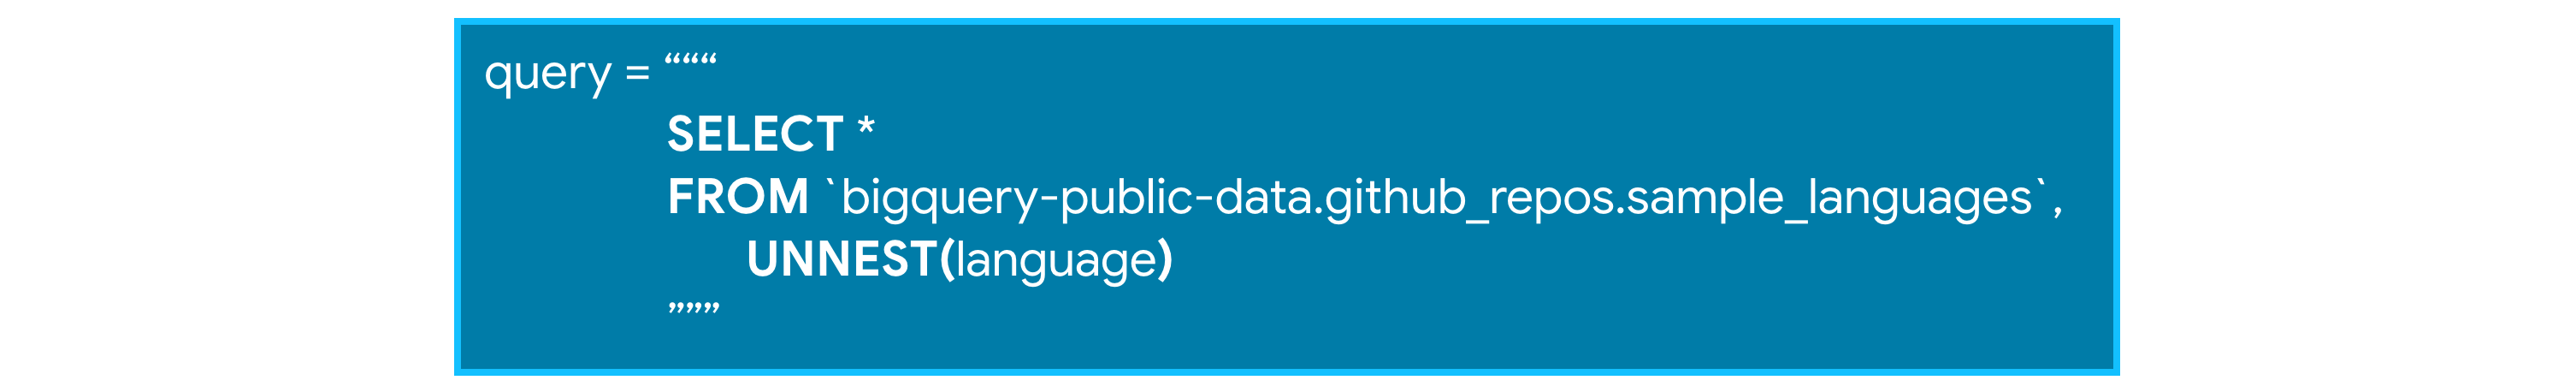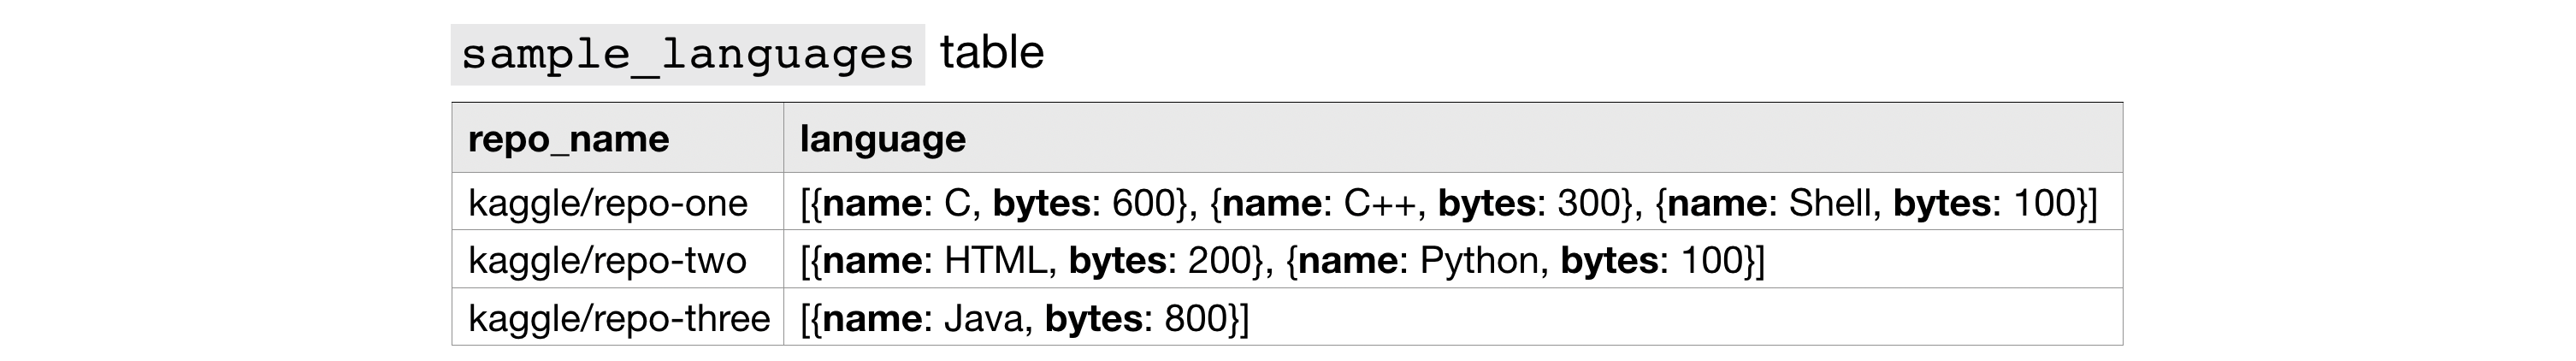Assume for the moment that you have access to a table called `sample_languages` that contains only a very small subset of the rows from the `languages` table: in fact, it contains only three rows!  This table is depicted in the image below.

![](https://storage.googleapis.com/kaggle-media/learn/images/qAb5lZ2.png)

How many rows are in the table returned by the query below?

![](https://storage.googleapis.com/kaggle-media/learn/images/Q5qYAtz.png)

Fill in your answer in the next code cell.

In [7]:
# Fill in the blank
num_rows = 6

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### 3) What's the most popular programming language?

Write a query to leverage the information in the `languages` table to determine which programming languages appear in the most repositories.  The table returned by your query should have two columns:
- `language_name` - the name of the programming language
- `num_repos` - the number of repositories in the `languages` table that use the programming language

Sort the table so that languages that appear in more repos are shown first.

In [8]:
# Write a query to find the answer
pop_lang_query = """
                 SELECT l.name AS language_name,
                 COUNT(*) AS num_repos
                 FROM `bigquery-public-data.github_repos.languages`,
                     UNNEST(language) AS l
                 GROUP BY language_name
                 ORDER BY num_repos DESC
                 """

# Check your answer
q_3.check()

,language_name,num_repos
0,JavaScript,1099966
1,CSS,807826
2,HTML,777433
3,Shell,640886
4,Python,550905


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### 4) Which languages are used in the repository with the most languages?

For this question, you'll restrict your attention to the repository with name `'polyrabbit/polyglot'`.

Write a query that returns a table with one row for each language in this repository.  The table should have two columns:
- `name` - the name of the programming language
- `bytes` - the total number of bytes of that programming language

Sort the table by the `bytes` column so that programming languages that take up more space in the repo appear first.

In [9]:
# Your code here
all_langs_query = """
                  SELECT l.name AS name, l.bytes AS bytes
                  FROM `bigquery-public-data.github_repos.languages`,
                      UNNEST(language) as l
                  WHERE repo_name = 'polyrabbit/polyglot'   
                  ORDER BY bytes DESC
                  """

# Check your answer
q_4.check()

,name,bytes
0,Lasso,834726
1,C,819142
2,Mercury,709952
3,Objective-C,495392
4,Game Maker Language,298131


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# Keep going

Learn how to make your queries **[more efficient](https://www.kaggle.com/alexisbcook/writing-efficient-queries)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/advanced-sql/discussion) to chat with other learners.*